In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import fft 
import math as m

In [2]:
def wavenum(i, N) : return (i + N // 2) % N - N // 2

Text(0.5, 1.0, 'Filter with M=3.')

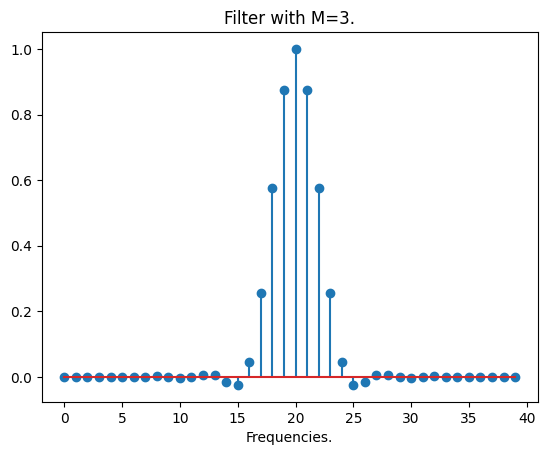

In [3]:
# Create filter.
filter_size = 40

M = 3
H = np.zeros(filter_size, dtype=complex)

for i in range(filter_size):
    k = wavenum(i, filter_size)
    a = 2 * np.pi / filter_size * k * M 
    
    #G_b, integral from -M to M of cos(t*pi/M) e^(-iwt)
    if (m.isclose(a, np.pi/M)):
        H[i] = M
    elif (m.isclose(a, -np.pi/M)):
        H[i] = M
    else:
        H[i] += -(2 * M**2 * a * np.sin(M * a))/(M**2 * a**2 - np.pi**2)

    # G_a, integral from -M to M of e^(-iwt)
    if a != 0:
        H[i] += 2 * np.sin(M * a) / a
    else:
        H[i] = 2 * M
        
        
H /= 2.0 * M
plt.stem(np.arange(filter_size),  np.fft.fftshift(H).real)
plt.xlabel("Frequencies.")
plt.title("Filter with M="+ str(M) + ".")

Text(0.5, 0, 'Time Domain')

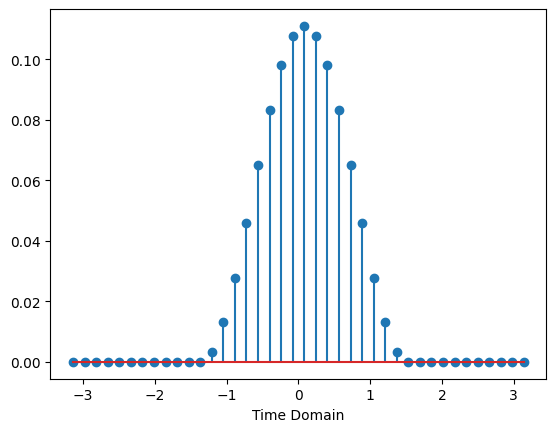

In [4]:
# Inverse Fourier Transform of the filter, fftshifted. TIME DOMAIN
h = np.fft.ifft(H)
plt.stem(np.linspace(-np.pi, np.pi, filter_size), np.fft.fftshift(h).real)
plt.xlabel("Time Domain")

Text(0.5, 0, 'Frequency domain')

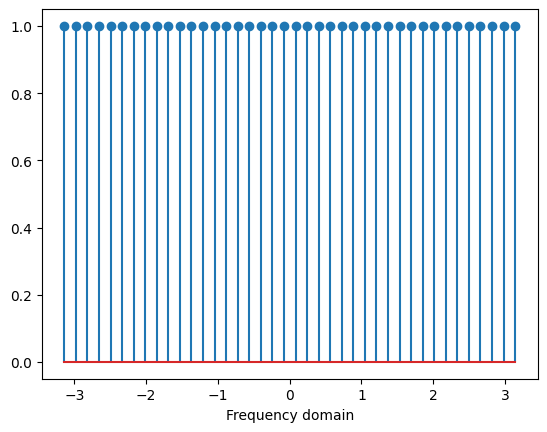

In [5]:
#Shift phase. Based on size of filter since it is that which we are shifting now.
SHIFT = 20.0001
delta = SHIFT % 1
L = np.zeros(filter_size, dtype=complex)
for i in range(filter_size):
    L[i] = np.exp(-2j * np.pi * delta * wavenum(i,filter_size) /filter_size)
plt.stem(np.linspace(-np.pi, np.pi, filter_size), L.real)
plt.xlabel("Frequency domain")

(0.11109839619469186-3.827021184374547e-24j)
(0.10777425436604796+3.827021184374547e-24j)
(0.09810138736168733-3.827021184374547e-24j)
(0.0833494563269628+3.827021184374547e-24j)
(0.06518851716747447-3.827021184374547e-24j)
(0.04592898245525232+3.827021184374547e-24j)
(0.027756668178361463-3.827021184374547e-24j)
(0.013028601254696327+3.827021184374547e-24j)
(0.0033095475404642306-3.827021184374547e-24j)
(9.373273874319078e-07+3.827021184374547e-24j)
(3.9761803128213206e-05-3.827021184374547e-24j)
(-2.80375398957089e-05+3.827021184374547e-24j)
(2.0949126402147747e-05-3.827021184374547e-24j)
(-1.6715947130613306e-05+3.827021184374547e-24j)
(1.4032807870134612e-05-3.827021184374547e-24j)
(-1.2254406189038393e-05+3.827021184374547e-24j)
(1.1048741905178839e-05-3.827021184374547e-24j)
(-1.0234554071181582e-05+3.827021184374547e-24j)
(9.708919113411708e-06-3.827021184374547e-24j)
(-9.41347129224876e-06+3.827021184374547e-24j)
(9.318116674478413e-06-3.827021184374547e-24j)
(-9.41355250832359

Text(0.5, 0, 'Time domain')

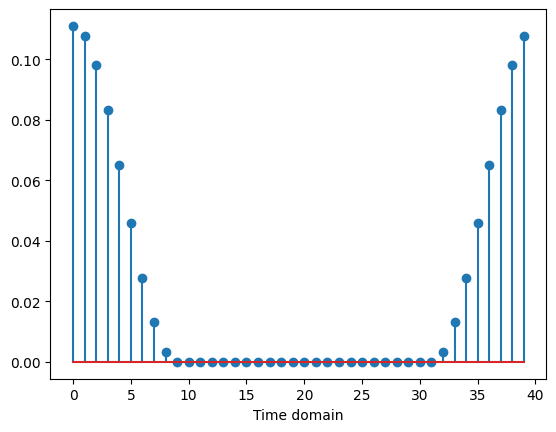

In [6]:
# Multiply filter by phase shift and do Inverse Fourier Transform.
z = np.fft.ifft(L * H)
for i in range(filter_size):
    print(z[i])
plt.stem(np.arange(filter_size),z.real)
plt.xlabel("Time domain")

<StemContainer object of 3 artists>

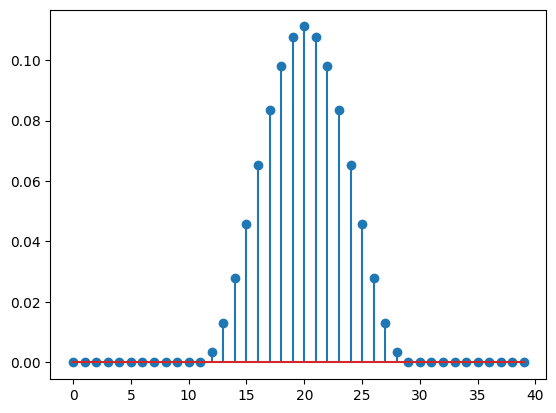

In [7]:
plt.stem(np.arange(filter_size), np.fft.fftshift(z).real)

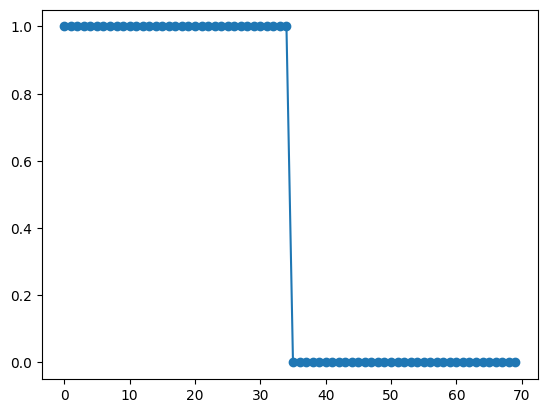

In [8]:
n = 70
x_o = np.arange(n)
xn = n * 0.5
x = x_o < xn
x = np.array(x)
plt.plot(x_o,x, marker ='o')

<StemContainer object of 3 artists>

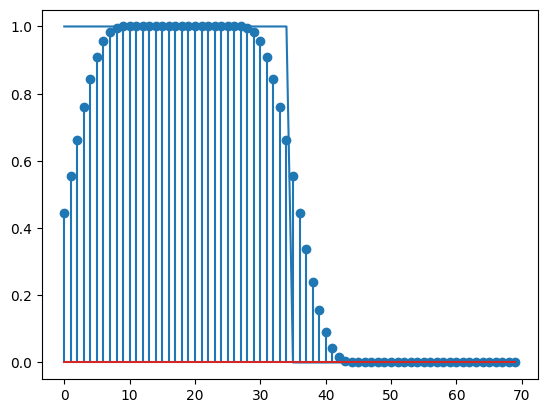

In [9]:
x_shifted_filter = np.zeros(n, dtype=complex)
x_shifted_filter = np.convolve(x,np.fft.fftshift(z), 'same')
plt.plot(x_o,x)
plt.stem(x_o,x_shifted_filter.real)

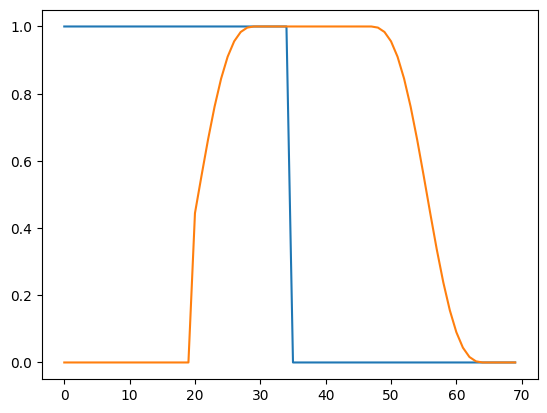

In [10]:
x_shifted = np.zeros(n, dtype=complex)
for i in range(n):
        new_index = (i + int(SHIFT)) % n
        x_shifted[new_index] = x_shifted_filter[i]
plt.plot(x_o,x)
plt.plot(x_o,x_shifted.real)